In [240]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [140]:
# Select 2 prime numbers 
p = 19
q = 13

In [141]:
# First public key
n = p * q
n

247

In [142]:
def gcd(a, b):
 
    if (a == 0):
        return b
    return gcd(b % a, a)

In [143]:
def phi(n):
 
    result = 1
    for i in range(2, n):
        if (gcd(i, n) == 1):
            result+=1
    return result

In [144]:
# Calculating Phi(n)
phi_n = phi(n)
phi_n

216

In [145]:
# e = random.randint(0, phi_n)
e = 5

In [146]:
pulbic_key  = (n, e)

In [149]:
# k = random.randint(1, 10)
k = 4

In [151]:
d = (k * phi_n + 1) / (e)
d

173.0

In [152]:
private_key = d

In [153]:
s = 'abcdefghijklmnopqrstuvwxyz'
s = [x for x in s]

In [154]:
msg = "hi"
conv2num = ''

for letter in msg:
    conv2num += str(s.index(letter)+1)

conv2num = int(conv2num)

In [155]:
conv2num

89

In [156]:
encrypted = pow(conv2num, e) % n
encrypted

33

In [157]:
plaintext = pow(encrypted, int(d)) % n
plaintext

89

In [192]:
image = cv2.imread('input.jpg', 0)
image.shape

(225, 225)

In [193]:
plt.imshow(image)
 
# display that image
plt.show()
def encrypt(input, e = 5, n = 247):
    cipher = pow(input, e) % n
    return cipher

In [194]:
shape = image.shape

In [195]:
image

array([[129, 130, 132, ...,  98,  99, 100],
       [130, 131, 133, ...,  98,  99, 100],
       [132, 133, 134, ...,  99, 100, 101],
       ...,
       [ 48,  93, 161, ...,   9,   0,  15],
       [ 98, 160, 192, ...,  19,  14,  22],
       [165, 188, 191, ...,  22,  23,  25]], dtype=uint8)

In [216]:
pixels = image.flatten()
enc = []

for pixel in pixels:
    print(f"{pixel} - {encrypt(int(pixel))}")
    enc.append(encrypt(int(pixel)))

enc = np.array(enc)

enc_image = enc.reshape(shape)

129 - 116
130 - 156
132 - 227
134 - 153
137 - 245
139 - 81
141 - 202
142 - 168
146 - 204
145 - 84
144 - 235
143 - 117
141 - 202
139 - 81
138 - 47
138 - 47
134 - 153
133 - 152
132 - 227
131 - 196
130 - 156
129 - 116
128 - 124
127 - 147
129 - 116
129 - 116
128 - 124
127 - 147
126 - 198
125 - 216
125 - 216
124 - 193
124 - 193
123 - 54
122 - 31
120 - 100
119 - 123
117 - 91
116 - 51
115 - 20
114 - 95
114 - 95
115 - 20
116 - 51
117 - 91
118 - 131
119 - 123
119 - 123
122 - 31
121 - 49
120 - 100
118 - 131
116 - 51
114 - 95
112 - 177
111 - 232
110 - 2
111 - 232
113 - 94
114 - 95
113 - 94
111 - 232
108 - 166
106 - 45
109 - 200
109 - 200
110 - 2
110 - 2
111 - 232
112 - 177
113 - 94
113 - 94
116 - 51
118 - 131
120 - 100
122 - 31
122 - 31
120 - 100
118 - 131
116 - 51
114 - 95
114 - 95
114 - 95
113 - 94
113 - 94
113 - 94
113 - 94
113 - 94
111 - 232
111 - 232
111 - 232
110 - 2
110 - 2
110 - 2
109 - 200
109 - 200
108 - 166
108 - 166
109 - 200
109 - 200
110 - 2
111 - 232
112 - 177
112 - 177
109 - 200
1

In [217]:
enc_image

array([[116, 156, 227, ..., 167, 112, 237],
       [156, 196, 152, ..., 167, 112, 237],
       [227, 152, 153, ..., 112, 237,  43],
       ...,
       [  3,   6, 187, ...,  16,   0,  97],
       [167,  88, 108, ..., 171, 105, 224],
       [185, 158, 172, ..., 224,  17, 233]])

In [224]:
cv2.imwrite('rsa_encryption.jpg', enc_image)

True

In [225]:
def decryption(encrypted, d=173, n=247):
    return pow(encrypted, int(d)) % n
    

In [245]:
image2 = cv2.imread('rsa_encryption.jpg', 0)
pixels_enc = enc_image.flatten()
image2

array([[115, 155, 226, ..., 166, 112, 237],
       [155, 201, 150, ..., 171, 111, 237],
       [228, 148, 153, ..., 109, 238,  44],
       ...,
       [  2,   5, 188, ...,  14,   2,  97],
       [166,  90, 108, ..., 171, 105, 224],
       [185, 158, 172, ..., 224,  17, 233]], dtype=uint8)

In [246]:

og = []

for pixel in pixels_enc:
    og.append(decryption(int(pixel)))

og = np.array(og)

og_image = og.reshape(shape)
og_image

array([[129, 130, 132, ...,  98,  99, 100],
       [130, 131, 133, ...,  98,  99, 100],
       [132, 133, 134, ...,  99, 100, 101],
       ...,
       [ 48,  93, 161, ...,   9,   0,  15],
       [ 98, 160, 192, ...,  19,  14,  22],
       [165, 188, 191, ...,  22,  23,  25]])

In [247]:
cv2.imwrite('og.jpg', og_image)

True

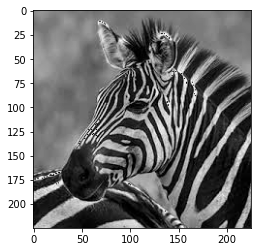

In [250]:
plt.imshow(og_image, cmap='gray')
 
# display that image
plt.show()